 Matrix Operations in Neural Nets

In [1]:
pip install pandas numpy scikit-learn tensorflow matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [3]:
df = pd.read_csv('Iris.csv') 
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df = df.iloc[:100]
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,Iris-versicolor
96,5.7,2.9,4.2,1.3,Iris-versicolor
97,6.2,2.9,4.3,1.3,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor


In [6]:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y = df['species'].values

In [7]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
y_onehot = to_categorical(y_encoded)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_onehot, test_size=0.2, random_state=42)

In [11]:
np.random.seed(42)
weights = np.random.randn(X_train.shape[1], y_train.shape[1])
biases = np.random.randn(y_train.shape[1])

In [12]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [13]:
manual_outputs = sigmoid(np.dot(X_test, weights) + biases)

In [14]:
model = Sequential()
model.add(Dense(y_train.shape[1], input_shape=(X_train.shape[1],), activation='sigmoid'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, verbose=0)

c:\Users\loalo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
keras_outputs = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


In [16]:
y_test_labels = np.argmax(y_test, axis=1)
manual_pred_labels = np.argmax(manual_outputs, axis=1)
keras_pred_labels = np.argmax(keras_outputs, axis=1)

In [17]:
print("Actual labels:      ", y_test_labels)
print("Manual predictions: ", manual_pred_labels)
print("Keras predictions:  ", keras_pred_labels)

Actual labels:       [1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0]
Manual predictions:  [0 0 0 1 1 1 1 0 1 1 1 1 0 1 0 1 0 0 1 1]
Keras predictions:   [1 1 1 1 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0]


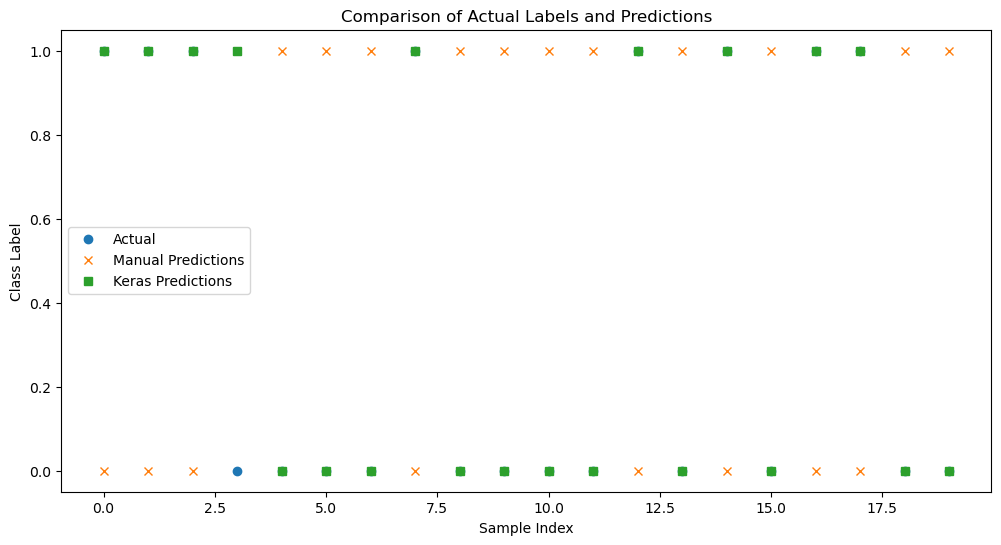

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_labels, 'o', label='Actual')
plt.plot(manual_pred_labels, 'x', label='Manual Predictions')
plt.plot(keras_pred_labels, 's', label='Keras Predictions')
plt.legend()
plt.title('Comparison of Actual Labels and Predictions')
plt.xlabel('Sample Index')
plt.ylabel('Class Label')
plt.show()